In [480]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [482]:
df = pd.read_csv('data/scores.csv', error_bad_lines=False)

In [484]:
#Got rid of percentage signs

# df['Percent White'] = df['Percent White'].str.rstrip('%').astype('float')/100
# df['Percent Black'] = df['Percent Black'].str.rstrip('%').astype('float')/100
# df['Percent Hispanic'] = df['Percent Hispanic'].str.rstrip('%').astype('float')/100
# df['Percent Asian'] = df['Percent Asian'].str.rstrip('%').astype('float')/100
# df['Percent Tested'] = df['Percent Tested'].str.rstrip('%').astype('float')/100

In [485]:
#gets rid of columns with na values
df = df.dropna()

### First 5 rows of Dataframe

In [486]:
df.head()

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 PM,1735.0,0.286,0.133,0.180,0.385,657.0,601.0,601.0,0.910
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 PM,358.0,0.117,0.385,0.413,0.059,395.0,411.0,387.0,0.789
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 PM,383.0,0.031,0.282,0.569,0.086,418.0,428.0,415.0,0.651
5,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:35 PM,416.0,0.017,0.031,0.055,0.889,613.0,453.0,463.0,0.959
6,01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,-73.98526,...,3:30 PM,255.0,0.039,0.244,0.566,0.132,410.0,406.0,381.0,0.597


### Show description of data set

In [487]:
df.describe()

,Zip Code,Latitude,Longitude,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,10736.066845,40.742754,-73.923427,756.459893,0.085246,0.353872,0.439297,0.104126,432.719251,424.342246,418.286096,0.647353
std,537.245046,0.082434,0.071961,774.287044,0.133592,0.253672,0.244956,0.144006,71.916833,61.884529,64.548388,0.188600
min,10002.000000,40.528230,-74.192150,142.000000,0.000000,0.000000,0.026000,0.000000,317.000000,302.000000,284.000000,0.185000
25%,10306.000000,40.684780,-73.979260,397.250000,0.013000,0.164000,0.208250,0.016000,386.000000,386.000000,382.000000,0.507250
50%,10472.000000,40.739755,-73.927510,482.500000,0.026000,0.287500,0.453000,0.042000,414.000000,412.500000,402.500000,0.638000
75%,11217.000000,40.820995,-73.887532,660.500000,0.093750,0.501000,0.633750,0.111500,457.250000,444.500000,436.000000,0.795000
max,11694.000000,40.888370,-73.726910,5447.000000,0.799000,0.912000,1.000000,0.889000,754.000000,697.000000,693.000000,1.000000


### Show info of data set

In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 2 to 434
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School ID                    374 non-null    object 
 1   School Name                  374 non-null    object 
 2   Borough                      374 non-null    object 
 3   Building Code                374 non-null    object 
 4   Street Address               374 non-null    object 
 5   City                         374 non-null    object 
 6   State                        374 non-null    object 
 7   Zip Code                     374 non-null    int64  
 8   Latitude                     374 non-null    float64
 9   Longitude                    374 non-null    float64
 10  Phone Number                 374 non-null    object 
 11  Start Time                   374 non-null    object 
 12  End Time                     374 non-null    object 
 13  Student Enrollment  

In [498]:
X = df['Average Score (SAT Reading)'].values
y = df['Average Score (SAT Writing)'].values

y2 = df['Average Score (SAT Math)'].values

In [490]:
#X

In [499]:
#y
#y2

array([657., 395., 418., 613., 410., 634., 389., 438., 437., 381., 430.,
       452., 446., 403., 501., 446., 446., 411., 577., 418., 469., 390.,
       454., 592., 534., 522., 595., 378., 410., 386., 433., 560., 439.,
       518., 350., 375., 395., 366., 451., 445., 469., 455., 409., 445.,
       428., 641., 375., 392., 583., 592., 421., 581., 415., 393., 489.,
       406., 381., 390., 583., 357., 379., 385., 483., 429., 478., 556.,
       416., 402., 683., 459., 383., 387., 443., 344., 425., 496., 418.,
       418., 463., 378., 367., 401., 495., 374., 438., 485., 431., 435.,
       754., 420., 483., 453., 432., 711., 454., 494., 496., 442., 477.,
       390., 403., 402., 384., 398., 374., 380., 390., 371., 419., 345.,
       463., 420., 377., 363., 355., 370., 513., 424., 400., 394., 377.,
       407., 387., 445., 395., 417., 375., 382., 431., 398., 365., 385.,
       402., 404., 401., 413., 398., 408., 355., 387., 376., 378., 417.,
       366., 418., 364., 345., 377., 393., 379., 39

In [492]:
X = X.reshape(-1,1)
#X

### Split data into train and test data

In [493]:
# splitting data into 2 seperate groups. training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=100)

### Fit training split into regression model

Text(0.5, 1.0, 'S.A.T. data')

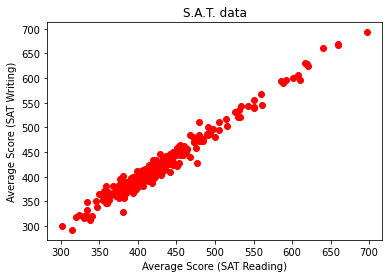

In [495]:
plt.scatter(x_train, y_train, color='red')
plt.xlabel('Average Score (SAT Reading)')
plt.ylabel('Average Score (SAT Writing)')
plt.title('S.A.T. data')

In [496]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)

### Show models regression score

In [497]:
print(f'Training Accuracy {round(lm.score(x_train, y_train) * 100,2)}%')
print(f'Test Accuracy {round(lm.score(x_test, y_test) * 100,2)}%')

Training Accuracy 97.04%
Test Accuracy 97.3%


### 3 Conclusions

- 